_______________________________________________________________________________________________

<span style="font-size:25px">
    The aim is to find the numerical solutions of the LQR problems
</span>


<span style="font-size:20px">
    More specifically we will implement two methods to find the optimal control of the problem described in question 4 (of the Part 2 project of MA5232, NUS)
</span>

Our problem:

$X'_t = A_t \cdot X_t +  B_t \cdot u_t$, with here $X_t = (x_t, v_t)^T$, $A_t = ((0, 0)^T, (1, -\alpha_t)^T)$ and $B_t = (0, 1)^T$

The cost functionnal: $\Phi(x) = x^T\cdot M \cdot x$, with here $M = ((1, 0)^T, (0,0)^T)$


And the running cost: $L(t,x,u) = x^T\cdot Q_t \cdot x + u^T\cdot R_t \cdot u$, with here $Q_t = ((0, 0)^T, (0, 0)^T)$ and $R_t = (\lambda)$

_______________________________________________________________________________________________

Let's first solve the optimal control problem, by using the Ricatti Differential Equation satisfied by $P$:

$P'_t = -P_t\cdot A_t - A_t^T\cdot P_t - Q_t + P_t \cdot B_t \cdot R^{-1}_t \cdot B_t^T \cdot P_t$, and $P_T = M$

Solving that and having $X_0$, we directly get: $u_t = - R^{-1}_t\cdot B_t^T \cdot P_t \cdot X_t$

In [1]:
from matplotlib import pyplot as plt
from math import *
import numpy as np

In [3]:
# Let's define all our parameters for that specific problem

In [4]:
N   = 1_000
dt  = 1/N
lam = 0.5

def alpha(t):
    return(sin(10*t))
def A(t):
    A = np.array([[0,1],
                 [0,-alpha(t)]])
    return(A)

B = np.array([[0],
              [1]])
M = np.array([[1,0],
              [0,0]])
R = lam

# Here Q = 0

P  = [M]
X0 = np.array([[1], 
               [0]])
X  = [X0]

In [5]:
for i in range(N):
    Pi = P[-1]
    Ai = A(dt *(N - i))
    Pi = Pi + dt * (np.dot(Pi, Ai) + np.dot(np.transpose(Ai), Pi) - np.dot(np.dot(Pi, B), np.dot(np.transpose(B), Pi)) / lam)
    P.append(Pi)

P = list(reversed(P))

In [7]:
for i in range(N):
    Ai = A(i*dt)
    Xi = X[-1] + dt * np.dot((Ai - np.dot(B, np.dot(np.transpose(B), P[i])) / lam), X[-1])
    X.append(Xi)

In [11]:
u = []
for i in range(N):
    ui = - np.dot((np.dot(np.transpose(B), P[i]) / lam), X[i])
    u.append(ui[0][0])

[-1.091764232390235, -1.0905649695545099, -1.0893765971660843, -1.088199089586572, -1.0870324204244597, -1.085876562538812, -1.0847314880429446, -1.0835971683080574, -1.082473573966829, -1.081360674916975, -1.08025844032477, -1.079166838628529, -1.0780858375420574, -1.0770154040580615, -1.075955504451523, -1.0749061042830388, -1.0738671684021273, -1.0728386609504974, -1.0718205453652854, -1.0708127843822572, -1.0698153400389796, -1.0688281736779555, -1.0678512459497322, -1.0668845168159755, -1.0659279455525124, -1.0649814907523487, -1.0640451103286537, -1.0631187615177176, -1.062202400881883, -1.061295984312448, -1.060399467032546, -1.059512803599998, -1.0586359479101428, -1.0577688531986449, -1.0569114720442783, -1.0560637563716915, -1.0552256574541512, -1.0543971259162672, -1.053578111736701, -1.052768564250855, -1.0519684321535485, -1.0511776635016774, -1.0503962057168623, -1.0496240055880817, -1.048861009274297, -1.0481071623070668, -1.0473624095931522, -1.0466266954171135, -1.0458

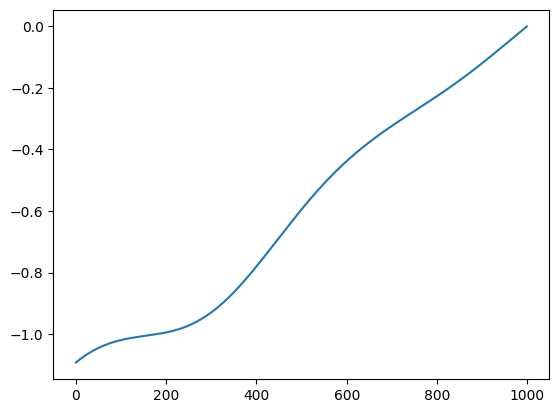

In [14]:
print(u)

print("J=", lam * dt * np.dot(np.transpose(u), u))

plt.plot(u)